In [78]:
import pandas as pd
import numpy as np
import pickle 
import time
import matplotlib.pyplot as plt
import random
import sklearn

%matplotlib inline
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth'] = 2

In [2]:
file_name = "noise_complaints.pickle"
complaints = pickle.load(open(file_name, "rb"))

In [7]:
densities = complaints['region_densities'][:]
areas = complaints['region_areas'][:]
names = complaints['region_names'][:]

total_complaints = complaints['Total']['Region'][:]
people_complaints = complaints['People']['Region'][:]
traffic_complaints = complaints['Traffic']['Region'][:]

total_complaint_per_region = np.zeros(59)
people_complaint_per_region = np.zeros(59)
traffic_complaint_per_region = np.zeros(59)
#num complaints will already be correlated with area due to size of regions
#will i need to do complaint densities ?

for r in range(len(names)):
    tot_inds = np.where(total_complaints == names[r])[0]
    total_complaint_per_region[r] = len(tot_inds)
    
    people_inds = np.where(people_complaints == names[r])[0]
    people_complaint_per_region[r] = len(people_inds)
    
    traffic_inds = np.where(traffic_complaints == names[r])[0]
    traffic_complaint_per_region[r] = len(traffic_inds)
    

total_complaint_densities = total_complaint_per_region/areas
people_complaint_densities = people_complaint_per_region/areas
traffic_complaint_densities = traffic_complaint_per_region/areas

log_densities = np.log10(densities)
log_total_complaint_densities = np.log10(total_complaint_densities)
log_people_complaint_densities = np.log10(people_complaint_densities)
log_traffic_complaint_densities = np.log10(traffic_complaint_densities)

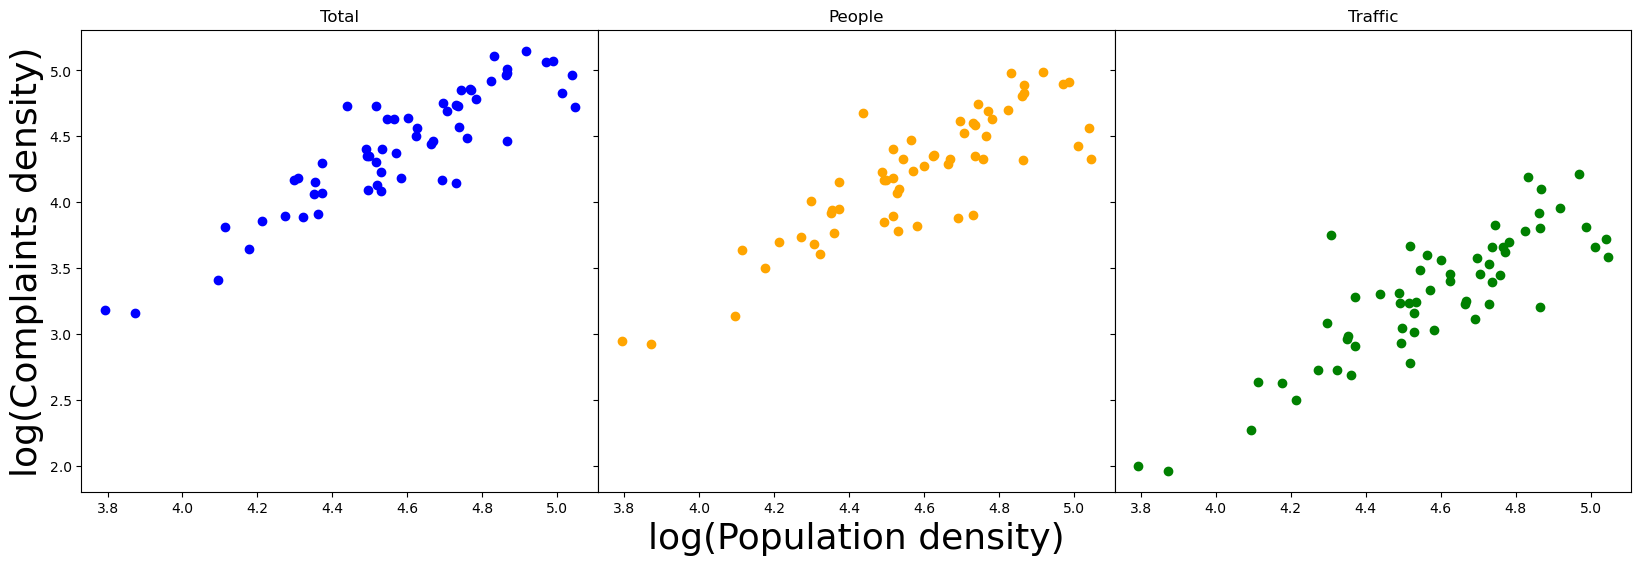

In [8]:
fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(20, 6), facecolor='white')
plt.subplots_adjust(wspace=0)

axs[0].scatter(log_densities, log_total_complaint_densities, color='blue')
axs[0].set_ylabel('log(Complaints density)', fontsize="26")
axs[0].set_title("Total")

axs[1].scatter(log_densities, log_people_complaint_densities, color='orange')
axs[1].set_title("People")
axs[1].set_xlabel('log(Population density)', fontsize="26")

axs[2].scatter(log_densities, log_traffic_complaint_densities, color='green')
axs[2].set_title("Traffic")


#plt.savefig('population_complaints.pdf', format='pdf', bbox_inches = 'tight')
plt.show()


0 RMS error = 0.2909673807604655
1 RMS error = 0.3493858618607186
2 RMS error = 0.3908631710164099


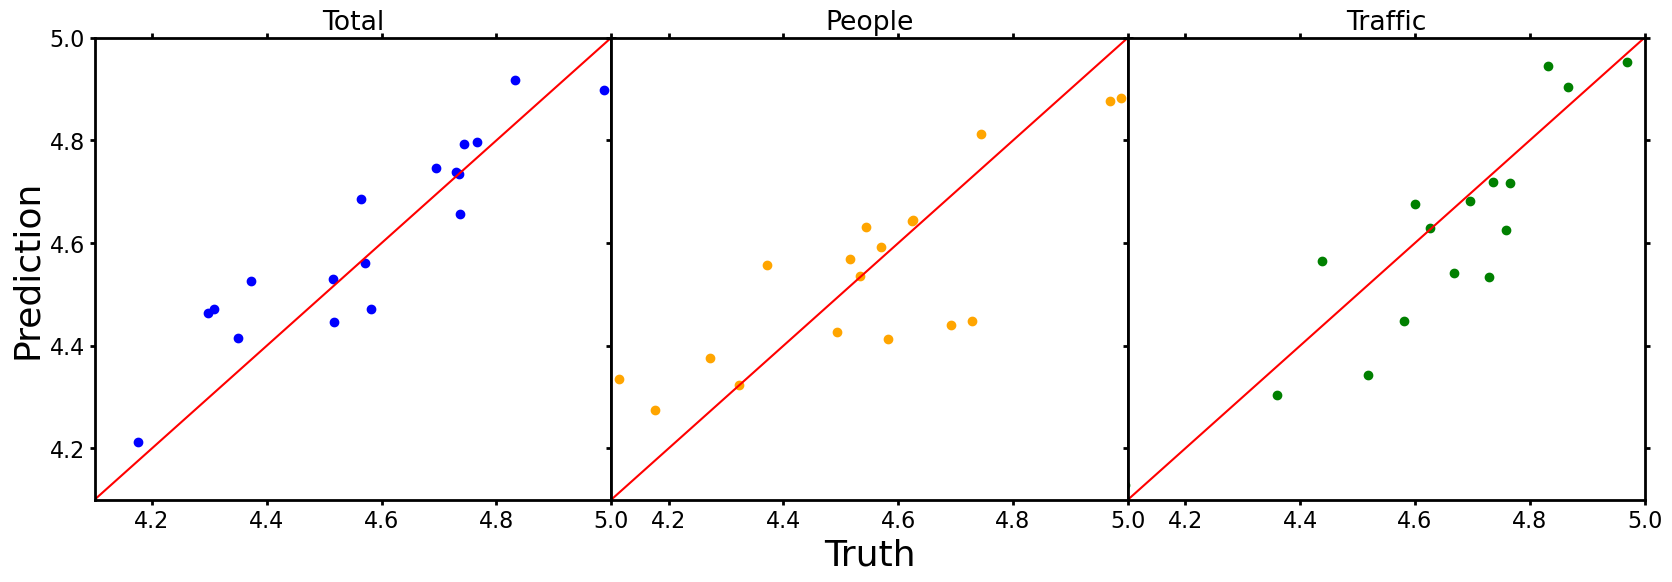

In [109]:
args = np.linspace(0,58,59)
args = [int(i) for i in args]
Y = log_densities
x = np.linspace(3.7,5.2, 10)

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(20, 6), facecolor='white')
plt.subplots_adjust(wspace=0)
i=0

for X in [log_total_complaint_densities, log_people_complaint_densities, log_traffic_complaint_densities]:
    random.shuffle(args)
    
    shuffled_X = X[args]
    shuffled_Y = Y[args]
    
    Xtrain = shuffled_X[:40] #40 for train
    Ytrain = shuffled_Y[:40]
    Xtrain = np.array(Xtrain).reshape(-1,1)
    Ytrain = np.array(Ytrain).reshape(-1,1)
    
    Xtest = shuffled_X[40:] #19 for test
    Ytest = shuffled_Y[40:]
    Xtest = Xtest.reshape(-1, 1)
    
    reg = linear_model.Ridge(alpha=1, solver='auto')
    reg.fit(Xtrain, Ytrain)
    Ypred = reg.predict(Xtest)
    RMS = np.sqrt(np.mean((Ytest - Ypred)**2))
    print(f'{i} RMS error = {RMS}')
    if i==0:
        axs[0].scatter(Ytest, Ypred, color='blue')
        axs[0].tick_params(width = 2,bottom=True, top=True, left=True, right=True)
        axs[0].plot(x, x,'r', label='ideal')
        axs[0].set_xlim(4.1,5)
        axs[0].set_ylim(4.1,5)
        axs[0].set_ylabel('Prediction', fontsize="26")
        axs[0].set_title("Total")
        #axs[0].legend()
    elif i==1:
        axs[1].scatter(Ytest, Ypred, color='orange')
        axs[1].tick_params(width = 2,bottom=True, top=True, left=True, right=True)
        axs[1].plot(x, x,'r')
        axs[1].set_title("People")
        axs[1].set_xlabel('Truth', fontsize="26")
    elif i==2:
        axs[2].scatter(Ytest, Ypred, color='green')
        axs[2].tick_params(width = 2,bottom=True, top=True, left=True, right=True)
        axs[2].plot(x, x,'r')
        axs[2].set_title("Traffic")
    i+=1
plt.savefig("linReg.pdf", format="pdf", bbox_inches='tight')

    
    

0 RMS error = 0.2995488035243145
1 RMS error = 0.32988309140055394
2 RMS error = 0.33874525063629274


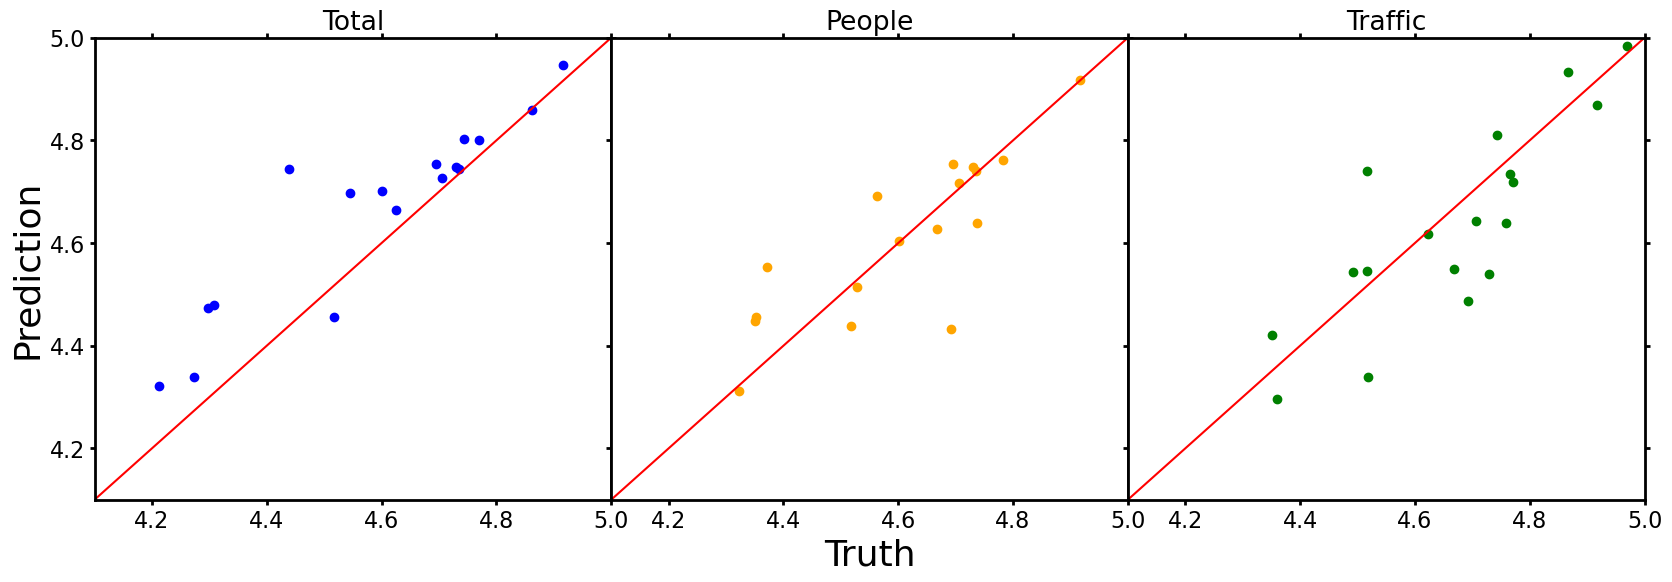

In [107]:
args = np.linspace(0,58,59)
args = [int(i) for i in args]
Y = log_densities
x = np.linspace(3.7,5.2, 10)

fig, axs = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(20, 6), facecolor='white')
plt.subplots_adjust(wspace=0)
i=0

for X in [log_total_complaint_densities, log_people_complaint_densities, log_traffic_complaint_densities]:
    random.shuffle(args)
    
    shuffled_X = X[args]
    shuffled_Y = Y[args]
    
    Xtrain = shuffled_X[:40] #40 for train
    Ytrain = shuffled_Y[:40]
    Xtrain = np.array(Xtrain).reshape(-1,1)
    Ytrain = np.array(Ytrain).reshape(-1,1)
    
    Xtest = shuffled_X[40:] #19 for test
    Ytest = shuffled_Y[40:]
    Xtest = Xtest.reshape(-1, 1)
    
    
    poly = preprocessing.PolynomialFeatures(degree=3)
    poly_features = poly.fit_transform(Xtrain.reshape(-1, 1))

    
    poly_reg = linear_model.Ridge(alpha=1, solver='auto')
    reg.fit(Xtrain, Ytrain)
    Ypred = reg.predict(Xtest)
    RMS = np.sqrt(np.mean((Ytest - Ypred)**2))
    print(f'{i} RMS error = {RMS}')
    if i==0:
        axs[0].scatter(Ytest, Ypred, color='blue')
        axs[0].tick_params(width = 2,bottom=True, top=True, left=True, right=True)
        axs[0].plot(x, x,'r', label='ideal')
        axs[0].set_xlim(4.1,5)
        axs[0].set_ylim(4.1,5)
        axs[0].set_ylabel('Prediction', fontsize="26")
        axs[0].set_title("Total")
        #axs[0].legend()
    elif i==1:
        axs[1].scatter(Ytest, Ypred, color='orange')
        axs[1].tick_params(width = 2,bottom=True, top=True, left=True, right=True)
        axs[1].plot(x, x,'r')
        axs[1].set_title("People")
        axs[1].set_xlabel('Truth', fontsize="26")
    elif i==2:
        axs[2].scatter(Ytest, Ypred, color='green')
        axs[2].tick_params(width = 2,bottom=True, top=True, left=True, right=True)
        axs[2].plot(x, x,'r')
        axs[2].set_title("Traffic")
    i+=1
plt.savefig("PolyReg.pdf", format="pdf", bbox_inches='tight')

    
    